In [45]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


In [46]:
class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if np.array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Solution state:')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            t += 1
            T = schedule(t)

            if T == 0:
                problem.printState(current, 'Solution state:')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            # print(deltaE, math.exp(deltaE/T), T)
            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        return 100 * 0.9**time


In [47]:
class NQueens:
    def __init__(self, N):
        self.maxValue = 0
        # self.state = np.array([i for i in range(1, N+1)])
        # np.random.shuffle(self.state)
        self.state = np.array([rnd.randint(1, N) for i in range(N)])
        self.printState(self.state, 'Initial state:')

    def printState(self, state, msg=''):
        # print(msg, state, '|', self.stateValue(state))

        # Build matrix to plot
        board = np.array([[1 if j+1 == state[i] else 0 for j in range(len(state))] for i in range(len(state))])
        plt.figure()
        plt.title(msg)
        plt.imshow(board)
        # plt.axis(False)

        plt.show()

    def initialState(self):
        # Always return the same start state
        return self.state

    def randomNeighbor(self, state):
        col = rnd.randint(0, len(state)-1)
        row = state[col]

        newRow = rnd.randint(1, len(state))
        while newRow == row:
            newRow = rnd.randint(1, len(state))

        state[col] = newRow
        return state.copy()

    def bestNeighbor(self, state):
        bestState = state.copy()

        # Change the first queen to guarantee that the bestState will always be different than the original state
        bestState[0] = len(state)+1 - bestState[0]

        bestValue = self.stateValue(bestState)

        # Randomize order to find the best neighbor
        cols = np.array([i for i in range(len(state))])
        np.random.shuffle(cols)

        for col in cols:
            newState = state.copy()
            for row in range(1, len(state)+1):
                if row != state[col]:
                    # Move queen
                    newState[col] = row

                    # If the new state is better than the current best
                    newValue = self.stateValue(newState)
                    if newValue > bestValue:
                        bestState = newState.copy()
                        bestValue = newValue

        return bestState

    def stateValue(self, state):
        value = 0
        for i in range(len(state) - 1):
            for j in range(i+1, len(state)):
                if state[j] == state[i] or abs(state[j] - state[i]) == j - i:
                    value += 1

        value *= -1
        return value


In [48]:
class TravellingSalesman:
    def __init__(self, N, size=100):
        self.cities = np.array([], dtype=int)

        for i in range(N):
            # Check that every city is different
            city = [rnd.randint(0, size), rnd.randint(0, size)]
            while city in self.cities:
                city = [rnd.randint(0, size), rnd.randint(0, size)]

            self.cities = np.append(self.cities, city)
            self.cities = np.reshape(self.cities, (i+1, 2))

        self.printState(self.cities, 'Cities:', False)

    def printState(self, state, msg='', showPath=True):
        # print(msg, state, '|', self.stateValue(state))

        plt.figure()
        plt.title(msg)

        if showPath:
            plt.plot(*zip(*state), 'o-')
            for i in range(len(state)-1):
                plt.annotate(f'  {i+1}', (state[i][0], state[i][1]))
        else:
            plt.plot(*zip(*state), 'o')

        plt.show()

    def initialState(self):
        # Always return the same cities with different order
        np.random.shuffle(self.cities)

        length = len(self.cities)
        state = np.append(self.cities, self.cities[0])
        state = np.reshape(state, (length+1, 2))

        return state

    def distanceBetweenCities(self, city1, city2):
        # Obtain distance between two cities
        return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

    def randomNeighbor(self, state):
        midState = state[:-1]

        # Choose two random cities
        choices = np.array([i for i in range(len(midState))])
        np.random.shuffle(choices)

        index = rnd.randint(0, len(midState) - 1)
        city1Index = choices[index]
        city2Index = choices[len(midState)-1 - index]

        # Swap cities
        tempCity = midState[city1Index].copy()
        midState[city1Index] = midState[city2Index].copy()
        midState[city2Index] = tempCity

        state[len(state)-1] = state[0]
        return state.copy()

    def bestNeighbor(self, state):
        bestState = state.copy()

        bestMidState = bestState[:-1]

        # Swap second two cities to guarantee that the bestState will always be different than the original state
        tempCity = bestMidState[1].copy()
        bestMidState[1] = bestMidState[2].copy()
        bestMidState[2] = tempCity

        bestValue = self.stateValue(bestState)

        # Randomize order to find the best neighbor
        indexes = np.array([i for i in range(len(bestMidState) - 1)])
        np.random.shuffle(indexes)

        for i in indexes:
            for j in range(i+1, len(bestMidState)):
                newState = state.copy()
                newMidState = newState[:-1]

                # Swap cities
                tempCity = newMidState[i].copy()
                newMidState[i] = newMidState[j].copy()
                newMidState[j] = tempCity

                # If new state is better than the current best
                newState[len(newState)-1] = newState[0]
                newValue = self.stateValue(newState)
                if newValue > bestValue:
                    bestState = newState.copy()
                    bestValue = newValue

        return bestState

    def stateValue(self, state):
        totalDistance = 0
        for i in range(len(state)-1):
            totalDistance += self.distanceBetweenCities(state[i], state[i+1])

        totalDistance *= -1
        return totalDistance


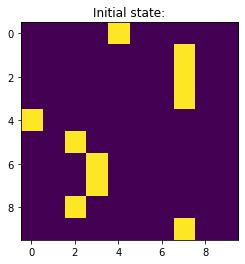

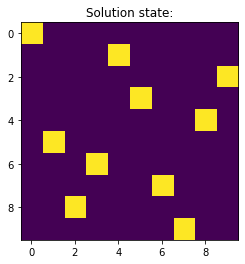

array([ 1,  5, 10,  6,  9,  2,  4,  7,  3,  8])

In [49]:
SearchAlgorithms.hillClimbingWithRandomRestart(NQueens(10))


C:\Users\Kiko\AppData\Local\Temp/ipykernel_59204/3194664306.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while city in self.cities:


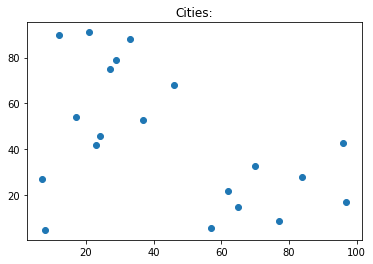

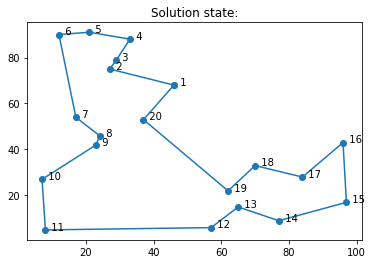

array([[46, 68],
       [27, 75],
       [29, 79],
       [33, 88],
       [21, 91],
       [12, 90],
       [17, 54],
       [24, 46],
       [23, 42],
       [ 7, 27],
       [ 8,  5],
       [57,  6],
       [65, 15],
       [77,  9],
       [97, 17],
       [96, 43],
       [84, 28],
       [70, 33],
       [62, 22],
       [37, 53],
       [46, 68]])

In [50]:
SearchAlgorithms.hillClimbingWithRandomRestart(TravellingSalesman(20))


In [51]:
# SearchAlgorithms.simulatedAnnealing(TravellingSalesman(10), SearchAlgorithms.schedule)
